Basic Creation of Regression using Tenserflow.

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
X = (np.random.randn(100)*10).astype(np.int16)
print(X)
y=(3*X+5).astype(np.int16)
print(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train=X_train.reshape(-1,1)
X_test=X_train.reshape(-1,1)
y_train=X_train.reshape(-1,1)
y_test=X_train.reshape(-1,1)

[-12  22  -6   3 -15  -8  -8  -5  -2   8   4   0   2 -12  -1  -5   6   6
   0   5   8   6  20  -2   6   0   7 -25  -6  -3  -1  -4 -15  13  11 -13
  -3   8  16   4  -6 -15   0 -17  17  -2   8  -7  10  13   0  -6   7 -14
  14   2   4   6  -6  18   5   0  -7  25 -12   7  15   7   5   0 -12  22
   2   1 -13   3  18   5  -1   3  -5  21   8   2   4   5  28  14  16  -1
  10  12  12   3 -13   9   7  19  22   1]
[-31  71 -13  14 -40 -19 -19 -10  -1  29  17   5  11 -31   2 -10  23  23
   5  20  29  23  65  -1  23   5  26 -70 -13  -4   2  -7 -40  44  38 -34
  -4  29  53  17 -13 -40   5 -46  56  -1  29 -16  35  44   5 -13  26 -37
  47  11  17  23 -13  59  20   5 -16  80 -31  26  50  26  20   5 -31  71
  11   8 -34  14  59  20   2  14 -10  68  29  11  17  20  89  47  53   2
  35  41  41  14 -34  32  26  62  71   8]


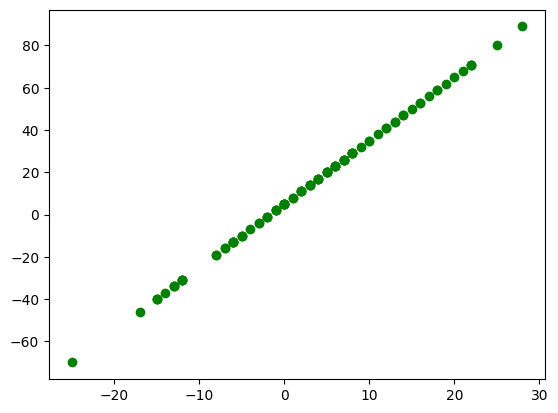

In [29]:
plt.plot(X,y, 'go')
plt.show()

In [30]:
tf.random.set_seed(10)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
3/3 [==============================] - 0s 5ms/step - loss: 0.6082 - mae: 0.6082
Epoch 2/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3523 - mae: 0.3523
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4275 - mae: 0.4275
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3911 - mae: 0.3911
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4090 - mae: 0.4090
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4023 - mae: 0.4023
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4856 - mae: 0.4856
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3601 - mae: 0.3601
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 0.4924 - mae: 0.4924
Epoch 10/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3457 - mae: 0.3457
Epoch 11/50
3/3 [==============================] - 0s 3ms/step - loss: 0.5107 - mae: 0.51

3/3 [==============================] - 0s 2ms/step


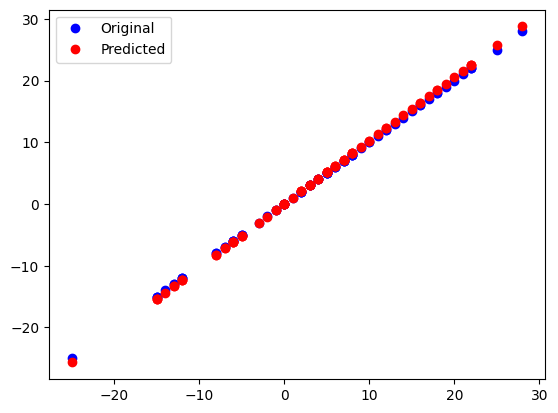

In [31]:
# print(X_test)
# print(y_test)
plt.plot(X_test,y_test, 'bo',label='Original')
plt.plot(X_test,model.predict(X_test), 'ro',label='Predicted')
plt.legend()
plt.show()

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [46]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.2447 - mae: 0.2447


[0.24470734596252441, 0.24470734596252441]

In [44]:
mea=tf.metrics.mean_absolute_error(y_test,model.predict(X_test))
mea=tf.metrics.mean_squared_error(y_test,model.predict(X_test))
print(mea)
tf.reduce_mean(mea)

3/3 [==============================] - 0s 2ms/step
tf.Tensor(
[1.01434685e-01 6.91184588e-03 2.34996229e-01 1.19206212e-01
 2.34996229e-01 1.86834130e-02 8.84096101e-02 2.61670679e-01
 3.17671895e-03 7.91017555e-06 1.23121895e-01 3.19324762e-01
 4.70943823e-02 3.50302547e-01 1.01434685e-01 4.51836437e-01
 7.32038915e-02 7.91017555e-06 4.70943823e-02 1.86834130e-02
 8.75420577e-04 1.63569346e-01 1.59051239e-01 1.71773806e-02
 4.46847305e-02 7.91017555e-06 3.50302547e-01 1.86834130e-02
 3.40818688e-02 2.49127932e-02 6.91184588e-03 2.49127932e-02
 1.71773806e-02 3.61903161e-02 3.17671895e-03 2.67200340e-02
 1.85944974e-01 1.59051239e-01 3.61903161e-02 5.74201287e-04
 3.40818688e-02 1.85944974e-01 1.38412192e-01 1.05049171e-01
 4.44303721e-01 6.91184588e-03 1.86834130e-02 5.74201287e-04
 4.70943823e-02 5.94324730e-02 1.71773806e-02 3.17671895e-03
 3.17671895e-03 7.32038915e-02 3.50302547e-01 2.67200340e-02
 1.86834130e-02 2.67200340e-02 1.01434685e-01 3.61903161e-02
 1.59051239e-01 4.70943

<tf.Tensor: shape=(), dtype=float32, numpy=0.09287954>

For Saving the model in pb file.
2 types HDF5 and savedModelformate.

In [48]:
model.save('First_TF_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
